In [ ]:
!pip install scikit-image matplotlib opencv-python

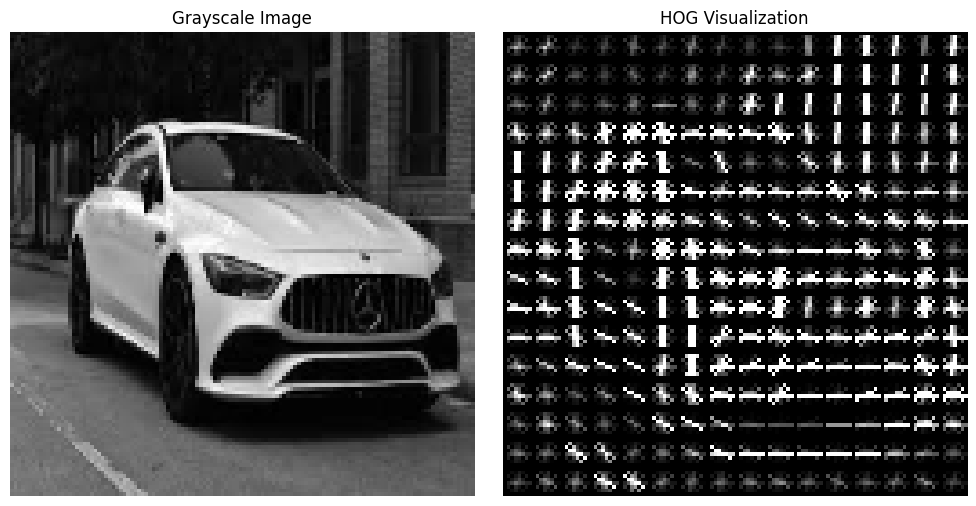

HOG Feature Vector shape: (8100,)
First 10 values: [0.22964574 0.12293932 0.22964574 0.04863785 0.22964574 0.06278037
 0.14360604 0.01258477 0.20450835 0.22964574]


In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# === 1. تحميل الصورة ===
image_path = 'images (3).jpg'  # ← غيّريها حسب اسم الصورة بتاعتك
image = cv2.imread(image_path)

if image is None:
    print(f"Error: couldn't load image at {image_path}")
else:
    # === 2. تحويل الصورة إلى رمادي ===
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # === 3. تصغير (اختياري لتحسين الأداء) ===
    resized = cv2.resize(gray, (128, 128))

    # === 4. استخراج HOG Features مع visualization ===
    features, hog_image = hog(
        resized,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys',
        visualize=True,
        feature_vector=True
    )

    # === 5. تحسين تباين صورة HOG للعرض ===
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    # === 6. عرض الصورة الرمادية وصورة الـ HOG ===
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Grayscale Image")
    plt.imshow(resized, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("HOG Visualization")
    plt.imshow(hog_image_rescaled, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # === 7. طباعة شكل الـ features ===
    print("HOG Feature Vector shape:", features.shape)
    print("First 10 values:", features[:10])